# Project 2

## Name: Drew Norton

In [5]:
import sqlite3
import sqlalchemy as sa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [6]:
%load_ext sql
%sql sqlite:///imdb.db

In [9]:
conn = sqlite3.connect('imdb.db')


### Task 1: Function 1

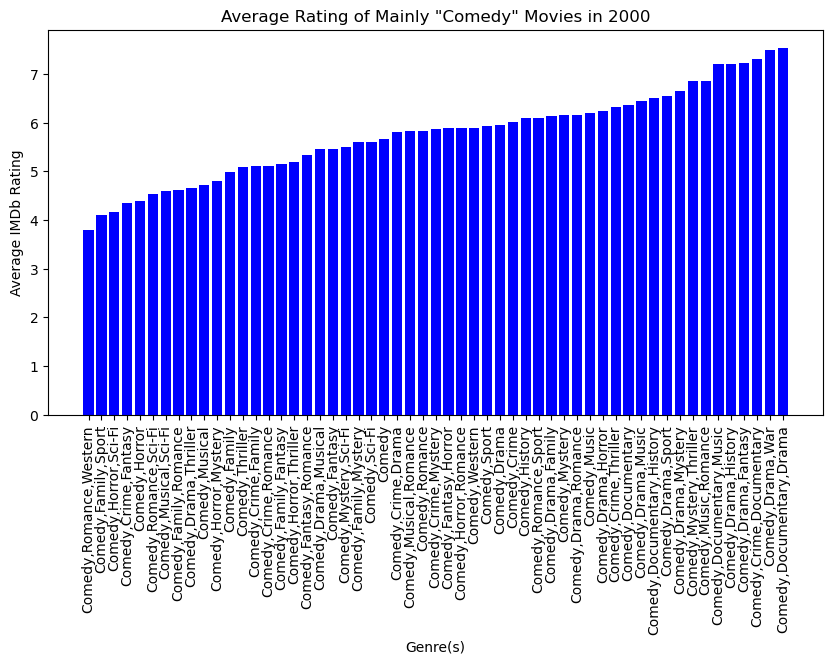

[('Comedy,Romance,Western', 3.8),
 ('Comedy,Family,Sport', 4.1),
 ('Comedy,Horror,Sci-Fi', 4.166666666666667),
 ('Comedy,Crime,Fantasy', 4.35),
 ('Comedy,Horror', 4.392857142857143),
 ('Comedy,Romance,Sci-Fi', 4.533333333333333),
 ('Comedy,Musical,Sci-Fi', 4.6),
 ('Comedy,Family,Romance', 4.62),
 ('Comedy,Drama,Thriller', 4.666666666666667),
 ('Comedy,Musical', 4.725),
 ('Comedy,Horror,Mystery', 4.8),
 ('Comedy,Family', 4.983333333333333),
 ('Comedy,Thriller', 5.083333333333333),
 ('Comedy,Crime,Family', 5.1),
 ('Comedy,Crime,Romance', 5.1),
 ('Comedy,Family,Fantasy', 5.16),
 ('Comedy,Horror,Thriller', 5.2),
 ('Comedy,Fantasy,Romance', 5.34),
 ('Comedy,Drama,Musical', 5.45),
 ('Comedy,Fantasy', 5.466666666666666),
 ('Comedy,Mystery,Sci-Fi', 5.5),
 ('Comedy,Family,Mystery', 5.6),
 ('Comedy,Sci-Fi', 5.6),
 ('Comedy', 5.663745019920318),
 ('Comedy,Crime,Drama', 5.8100000000000005),
 ('Comedy,Musical,Romance', 5.833333333333333),
 ('Comedy,Romance', 5.83625),
 ('Comedy,Crime,Mystery', 5.88

In [49]:
def avg_rating_for_most_fitting_genre_by_year(dbcon, movie_genre, year):
    query = """
    SELECT genres AS genre, AVG(ratings.rating) AS avg_rating
    FROM titles
    JOIN ratings ON titles.title_id = ratings.title_id
    WHERE titles.type = 'movie'
    AND titles.genres LIKE ?||'%'
    AND titles.premiered = ?
    GROUP BY titles.genres
    ORDER BY avg_rating
    """
    res = dbcon.execute(query, (movie_genre, year))
    result_list = res.fetchall()
    df = pd.DataFrame(result_list, columns=['genre', 'avg_rating'])

    
    plt.figure(figsize=(10, 5))
    plt.bar(df['genre'], df['avg_rating'], color='blue')
    plt.title(f'Average Rating of Mainly "{movie_genre.title()}" Movies in {year}')
    plt.xlabel('Genre(s)')
    plt.ylabel('Average IMDb Rating')
    plt.xticks(rotation = 90)
    plt.show()

    return result_list
avg_rating_for_most_fitting_genre_by_year(conn, 'comedy', 2000) 


### Task 1: Function 2

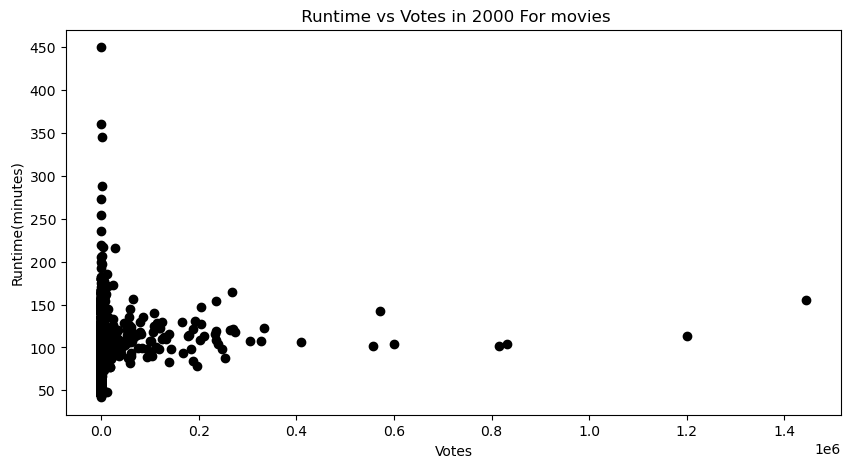

[(53, 5),
 (93, 5),
 (130, 5),
 (141, 5),
 (130, 5),
 (75, 6),
 (89, 6),
 (132, 6),
 (136, 6),
 (108, 6),
 (90, 6),
 (63, 6),
 (72, 6),
 (84, 6),
 (129, 6),
 (86, 6),
 (47, 6),
 (80, 6),
 (157, 6),
 (107, 6),
 (76, 7),
 (93, 7),
 (236, 7),
 (93, 7),
 (94, 7),
 (115, 7),
 (68, 7),
 (52, 7),
 (72, 7),
 (78, 7),
 (90, 7),
 (94, 7),
 (60, 7),
 (70, 7),
 (96, 7),
 (60, 7),
 (102, 7),
 (115, 7),
 (90, 7),
 (100, 7),
 (70, 7),
 (90, 7),
 (90, 7),
 (133, 7),
 (146, 7),
 (90, 7),
 (55, 7),
 (56, 7),
 (130, 7),
 (73, 7),
 (139, 7),
 (91, 7),
 (152, 7),
 (106, 7),
 (137, 7),
 (140, 7),
 (75, 8),
 (71, 8),
 (52, 8),
 (60, 8),
 (81, 8),
 (90, 8),
 (79, 8),
 (90, 8),
 (180, 8),
 (91, 8),
 (140, 8),
 (56, 8),
 (90, 8),
 (73, 8),
 (72, 8),
 (98, 8),
 (93, 8),
 (75, 8),
 (90, 8),
 (91, 8),
 (95, 8),
 (97, 8),
 (104, 8),
 (102, 8),
 (120, 8),
 (45, 8),
 (48, 8),
 (92, 8),
 (90, 8),
 (120, 8),
 (83, 8),
 (90, 8),
 (109, 8),
 (136, 8),
 (120, 8),
 (140, 8),
 (51, 8),
 (62, 8),
 (64, 8),
 (52, 8),
 (50, 8)

In [133]:
def runtime_and_votes(dbcon, content_type, year):
    query = """
    SELECT runtime_minutes AS runtime, ratings.votes AS votes
    FROM titles
    JOIN ratings ON titles.title_id = ratings.title_id
    WHERE titles.type = ?
    AND titles.premiered = ?
    AND runtime IS NOT NULL
    ORDER BY ratings.votes
    """
    res = dbcon.execute(query, (content_type, year))
    result_list = res.fetchall()
    df = pd.DataFrame(result_list, columns=['runtime', 'votes'])

    
    plt.figure(figsize=(10, 5))
    plt.scatter(df['votes'], df['runtime'], color='black')
    plt.title(f' Runtime vs Votes in {year} For {content_type}s')
    plt.xlabel('Votes')
    plt.ylabel('Runtime(minutes)')
    plt.show()

    return result_list
runtime_and_votes(conn, 'movie', 2000) 
